In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("hazadous_filled.csv")
df["totalCost"] = df["EST_COST_PROP_DAMAGE"]+df["EST_COST_OTHER"]+df["EST_COST_OPER_PAID"]+df["EST_COST_GAS_RELEASED"]+df["EST_COST_ENVIRONMENTAL"]+df["EST_COST_EMERGENCY"]

columns_to_delete = ["ID", "INSTALLATION_YEAR", "EST_COST_OPER_PAID", "EST_COST_GAS_RELEASED",
                     "EST_COST_PROP_DAMAGE", "EST_COST_EMERGENCY", "EST_COST_ENVIRONMENTAL", "EST_COST_OTHER","CAUSE_DETAILS"]
df.drop(columns=columns_to_delete, inplace=True, errors='ignore')
df = df[df["CAUSE"]=="MATERIAL FAILURE OF PIPE OR WELD"]
df.info()

# df = df[df['totalCost']<1.5e7]
# df.info()
# plt.boxplot(df['totalCost'])

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 9 to 4042
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   LOCATION_LATITUDE            303 non-null    float64
 1   LOCATION_LONGITUDE           303 non-null    float64
 2   COMMODITY_RELEASED_TYPE      303 non-null    object 
 3   UNINTENTIONAL_RELEASE_BBLS   303 non-null    float64
 4   INTENTIONAL_RELEASE_BBLS     303 non-null    float64
 5   RECOVERED_BBLS               303 non-null    float64
 6   FATAL                        303 non-null    int64  
 7   INJURE                       303 non-null    int64  
 8   ACCIDENT_IDENTIFIER          303 non-null    object 
 9   SYSTEM_PART_INVOLVED         303 non-null    object 
 10  PIPE_FAC_NAME                303 non-null    object 
 11  DESIGNATED_LOCATION          303 non-null    object 
 12  FEDERAL                      303 non-null    object 
 13  LOCATION_TYPE           

In [2]:
numerical_vars = ["LOCATION_LATITUDE", "LOCATION_LONGITUDE", "UNINTENTIONAL_RELEASE_BBLS",
                  "INTENTIONAL_RELEASE_BBLS", "RECOVERED_BBLS", "ACCIDENT_PSIG", "totalCost"]
for col in numerical_vars:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert categorical variables
categorical_vars = ["COMMODITY_RELEASED_TYPE", "FATAL", "INJURE", "ACCIDENT_IDENTIFIER",
                    "SYSTEM_PART_INVOLVED", "PIPE_FAC_NAME", "DESIGNATED_LOCATION", "FEDERAL",
                    "LOCATION_TYPE", "INCIDENT_AREA_TYPE", "CROSSING", "PIPE_FACILITY_TYPE",
                    "ITEM_INVOLVED", "MATERIAL_INVOLVED", "RELEASE_TYPE", "WILDLIFE_IMPACT_IND",
                    "SOIL_CONTAMINATION", "WATER_CONTAM_IND", "COULD_BE_HCA", "COMMODITY_REACHED_HCA",
                    "ACCIDENT_PRESSURE", "INTERNAL_INSPECTION_IND", "OPERATION_COMPLICATIONS_IND",
                    "PIPELINE_FUNCTION", "SCADA_IN_PLACE_IND", "CPM_IN_PLACE_IND", "CAUSE"]
for col in categorical_vars:
    df[col] = df[col].astype('category')

# Return first few rows of processed data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 9 to 4042
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   LOCATION_LATITUDE            303 non-null    float64 
 1   LOCATION_LONGITUDE           303 non-null    float64 
 2   COMMODITY_RELEASED_TYPE      303 non-null    category
 3   UNINTENTIONAL_RELEASE_BBLS   303 non-null    float64 
 4   INTENTIONAL_RELEASE_BBLS     303 non-null    float64 
 5   RECOVERED_BBLS               303 non-null    float64 
 6   FATAL                        303 non-null    category
 7   INJURE                       303 non-null    category
 8   ACCIDENT_IDENTIFIER          303 non-null    category
 9   SYSTEM_PART_INVOLVED         303 non-null    category
 10  PIPE_FAC_NAME                303 non-null    category
 11  DESIGNATED_LOCATION          303 non-null    category
 12  FEDERAL                      303 non-null    category
 13  LOCATION_

,LOCATION_LATITUDE,LOCATION_LONGITUDE,COMMODITY_RELEASED_TYPE,UNINTENTIONAL_RELEASE_BBLS,INTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,FATAL,INJURE,ACCIDENT_IDENTIFIER,SYSTEM_PART_INVOLVED,...,COMMODITY_REACHED_HCA,ACCIDENT_PSIG,ACCIDENT_PRESSURE,INTERNAL_INSPECTION_IND,OPERATION_COMPLICATIONS_IND,PIPELINE_FUNCTION,SCADA_IN_PLACE_IND,CPM_IN_PLACE_IND,CAUSE,totalCost
9,33.263307,-92.689986,HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS...,11.57,0.0,0.0,0,0,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS","ONSHORE PIPELINE, INCLUDING VALVE SITES",...,NO,673.0,PRESSURE DID NOT EXCEED MOP,YES,NO,> 20% SMYS REGULATED TRANSMISSION,YES,YES,MATERIAL FAILURE OF PIPE OR WELD,142138.0
86,42.719019,-82.861316,CRUDE OIL,4.00,0.0,4.0,0,0,NOTIFICATION FROM PUBLIC,"ONSHORE PIPELINE, INCLUDING VALVE SITES",...,NO,1247.0,PRESSURE DID NOT EXCEED MOP,YES,NO,> 20% SMYS REGULATED TRANSMISSION,YES,YES,MATERIAL FAILURE OF PIPE OR WELD,70120.0
121,30.618611,-94.969908,CRUDE OIL,30.00,0.0,30.0,0,0,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS",ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,...,NO,15.0,PRESSURE DID NOT EXCEED MOP,UNKNOWN,UNKNOWN,< 20% SMYS REGULATED TRANSMISSION,YES,YES,MATERIAL FAILURE OF PIPE OR WELD,150000.0
161,41.228104,-83.640085,CRUDE OIL,1974.00,0.0,1974.0,0,0,"LOCAL OPERATING PERSONNEL, INCLUDING CONTRACTORS","ONSHORE PIPELINE, INCLUDING VALVE SITES",...,NO,75.0,PRESSURE DID NOT EXCEED MOP,YES,NO,> 20% SMYS REGULATED TRANSMISSION,YES,YES,MATERIAL FAILURE OF PIPE OR WELD,2306948.0
162,38.844777,-90.089601,REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHI...,11694.00,0.0,4419.0,0,0,GROUND PATROL BY OPERATOR OR ITS CONTRACTOR,ONSHORE TERMINAL/TANK FARM EQUIPMENT AND PIPING,...,YES,7.6,PRESSURE DID NOT EXCEED MOP,UNKNOWN,UNKNOWN,< 20% SMYS REGULATED TRANSMISSION,YES,NO,MATERIAL FAILURE OF PIPE OR WELD,3627577.0


In [3]:
columns_to_adjust = []
for col in numerical_vars:
    if df[col].min() <= 0:
        columns_to_adjust.append(col)

columns_to_adjust

['LOCATION_LONGITUDE',
 'UNINTENTIONAL_RELEASE_BBLS',
 'INTENTIONAL_RELEASE_BBLS',
 'RECOVERED_BBLS',
 'ACCIDENT_PSIG']

In [4]:
from scipy.stats import boxcox

# Adjust columns with values less than or equal to 0
for col in columns_to_adjust:
    df[col] = df[col] + abs(df[col].min()) + 1

# Apply Box-Cox transformation to all numerical variables
transformed_data = df.copy()
for col in numerical_vars:
    transformed_data[col], _ = boxcox(df[col])

transformed_data[numerical_vars].head()

,LOCATION_LATITUDE,LOCATION_LONGITUDE,UNINTENTIONAL_RELEASE_BBLS,INTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,ACCIDENT_PSIG,totalCost
9,1.444393,72.878263,1.913256,0.0,0.000000,43.470973,7.348473
86,1.471659,105.462921,1.342559,0.0,1.199321,58.813489,7.093067
121,1.434406,65.766480,2.365210,0.0,1.904067,5.711495,7.367286
161,1.468037,102.774971,3.563774,0.0,2.455616,14.193773,8.213713
162,1.461786,81.204874,3.813216,0.0,2.492809,3.725595,8.335194


In [5]:
final_data = pd.concat([transformed_data[numerical_vars], df[categorical_vars]], axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder

# Identify columns with mixed data types
mixed_type_columns = []
for col in categorical_vars:
    unique_types = {type(item) for item in final_data[col]}
    if len(unique_types) > 1:
        mixed_type_columns.append(col)

# Convert mixed type columns to string
for col in mixed_type_columns:
    final_data[col] = final_data[col].astype(str)

# Apply Label Encoding to categorical variables
label_encoders = {}
for col in categorical_vars:
    le = LabelEncoder()
    final_data[col] = le.fit_transform(final_data[col])
    label_encoders[col] = le

# Display the first few rows of the encoded data
final_data.head()

,LOCATION_LATITUDE,LOCATION_LONGITUDE,UNINTENTIONAL_RELEASE_BBLS,INTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,ACCIDENT_PSIG,totalCost,COMMODITY_RELEASED_TYPE,FATAL,INJURE,...,WATER_CONTAM_IND,COULD_BE_HCA,COMMODITY_REACHED_HCA,ACCIDENT_PRESSURE,INTERNAL_INSPECTION_IND,OPERATION_COMPLICATIONS_IND,PIPELINE_FUNCTION,SCADA_IN_PLACE_IND,CPM_IN_PLACE_IND,CAUSE
9,1.444393,72.878263,1.913256,0.0,0.000000,43.470973,7.348473,3,0,0,...,1,1,0,0,2,0,2,1,1,0
86,1.471659,105.462921,1.342559,0.0,1.199321,58.813489,7.093067,2,0,0,...,0,0,0,0,2,0,2,1,1,0
121,1.434406,65.766480,2.365210,0.0,1.904067,5.711495,7.367286,2,0,0,...,0,1,0,0,1,1,0,1,1,0
161,1.468037,102.774971,3.563774,0.0,2.455616,14.193773,8.213713,2,0,0,...,0,0,0,0,2,0,2,1,1,0
162,1.461786,81.204874,3.813216,0.0,2.492809,3.725595,8.335194,4,0,0,...,0,1,1,0,1,1,0,1,0,0


In [7]:
from sklearn.feature_selection import VarianceThreshold
# VarianceThreshold 类从数据集 final_data 中选择具有足够方差的特征列
selector = VarianceThreshold()
selected_data = selector.fit_transform(final_data)

# Get the columns that were retained，VarianceThreshold 计算每个特征列的方差，并根据设定的阈值（默认为0）来选择保留方差大于阈值的特征
selected_columns = final_data.columns[selector.get_support()]

# Convert the selected data back to DataFrame
selected_data_df = pd.DataFrame(selected_data, columns=selected_columns)

# Display the first few rows of the selected data
selected_data_df.head()

,LOCATION_LATITUDE,LOCATION_LONGITUDE,UNINTENTIONAL_RELEASE_BBLS,INTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,ACCIDENT_PSIG,totalCost,COMMODITY_RELEASED_TYPE,FATAL,INJURE,...,SOIL_CONTAMINATION,WATER_CONTAM_IND,COULD_BE_HCA,COMMODITY_REACHED_HCA,ACCIDENT_PRESSURE,INTERNAL_INSPECTION_IND,OPERATION_COMPLICATIONS_IND,PIPELINE_FUNCTION,SCADA_IN_PLACE_IND,CPM_IN_PLACE_IND
0,1.444393,72.878263,1.913256,0.0,0.000000,43.470973,7.348473,3.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,1.0,1.0
1,1.471659,105.462921,1.342559,0.0,1.199321,58.813489,7.093067,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,1.0
2,1.434406,65.766480,2.365210,0.0,1.904067,5.711495,7.367286,2.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,1.468037,102.774971,3.563774,0.0,2.455616,14.193773,8.213713,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,1.0
4,1.461786,81.204874,3.813216,0.0,2.492809,3.725595,8.335194,4.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [8]:
import numpy as np

from sklearn.feature_selection import mutual_info_regression

# Extract the target variable
Y = selected_data_df['totalCost']
X = selected_data_df.drop(columns=['totalCost'])
# Compute mutual information between each feature and the target
mutual_info_scores = mutual_info_regression(X, Y, random_state=42)
# Compute mutual information and sort columns by their scores
sorted_columns = X.columns[np.argsort(mutual_info_scores)[::-1]]

# Display the features sorted by their mutual information scores
sorted_features_mi = pd.DataFrame({
    'Feature': sorted_columns,
    'Mutual Information': np.sort(mutual_info_scores)[::-1]
})

sorted_features_mi

,Feature,Mutual Information
0,UNINTENTIONAL_RELEASE_BBLS,0.337558
1,RECOVERED_BBLS,0.204117
2,ACCIDENT_IDENTIFIER,0.138189
3,RELEASE_TYPE,0.136931
4,LOCATION_LATITUDE,0.118352
5,WILDLIFE_IMPACT_IND,0.084769
6,WATER_CONTAM_IND,0.083584
7,OPERATION_COMPLICATIONS_IND,0.079002
8,LOCATION_LONGITUDE,0.075411
9,SYSTEM_PART_INVOLVED,0.063031


In [9]:
# Select columns with positive mutual information scores
selected_features = sorted_features_mi[sorted_features_mi['Mutual Information'] > 0]['Feature'].tolist()

# Filter the data to retain only the selected features
filtered_data = selected_data_df[selected_features]

# Display the first few rows of the filtered data
filtered_data.head()

,UNINTENTIONAL_RELEASE_BBLS,RECOVERED_BBLS,ACCIDENT_IDENTIFIER,RELEASE_TYPE,LOCATION_LATITUDE,WILDLIFE_IMPACT_IND,WATER_CONTAM_IND,OPERATION_COMPLICATIONS_IND,LOCATION_LONGITUDE,SYSTEM_PART_INVOLVED,...,PIPE_FAC_NAME,COMMODITY_RELEASED_TYPE,SOIL_CONTAMINATION,PIPE_FACILITY_TYPE,CROSSING,DESIGNATED_LOCATION,PIPELINE_FUNCTION,SCADA_IN_PLACE_IND,FEDERAL,MATERIAL_INVOLVED
0,1.913256,0.000000,5.0,2.0,1.444393,0.0,1.0,0.0,72.878263,2.0,...,31.0,3.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0
1,1.342559,1.199321,7.0,3.0,1.471659,0.0,0.0,0.0,105.462921,2.0,...,172.0,2.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0
2,2.365210,1.904067,5.0,1.0,1.434406,0.0,0.0,1.0,65.766480,4.0,...,109.0,2.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0
3,3.563774,2.455616,5.0,1.0,1.468037,0.0,0.0,0.0,102.774971,2.0,...,69.0,2.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0
4,3.813216,2.492809,4.0,5.0,1.461786,0.0,0.0,1.0,81.204874,4.0,...,132.0,4.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=500, random_state=42)  # n_estimators表示生成的决策树数量
rf.fit(filtered_data, Y)

# Get feature importances from the model
feature_importances = rf.feature_importances_

# Sort the features based on their importances
sorted_features_rf = pd.DataFrame({
    'Feature': filtered_data.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

sorted_features_rf

,Feature,Importance
0,UNINTENTIONAL_RELEASE_BBLS,0.388427
8,LOCATION_LONGITUDE,0.125262
1,RECOVERED_BBLS,0.097914
4,LOCATION_LATITUDE,0.088285
11,INCIDENT_AREA_TYPE,0.067272
16,PIPE_FAC_NAME,0.049465
9,SYSTEM_PART_INVOLVED,0.035605
17,COMMODITY_RELEASED_TYPE,0.025969
6,WATER_CONTAM_IND,0.022165
3,RELEASE_TYPE,0.021523


In [87]:
from sklearn.ensemble import RandomForestRegressor
# 考虑全部变量的相关性，不止考虑Mutual Information>0的情况。（经测试这种方式r-square降低）
# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=500, random_state=42)  # n_estimators表示生成的决策树数量
rf.fit(X, Y)

# Get feature importances from the model
feature_importances = rf.feature_importances_

# Sort the features based on their importances
sorted_features_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

sorted_features_rf

,Feature,Importance
2,UNINTENTIONAL_RELEASE_BBLS,0.380525
1,LOCATION_LONGITUDE,0.119708
0,LOCATION_LATITUDE,0.082364
5,ACCIDENT_PSIG,0.058783
9,PIPE_FAC_NAME,0.056904
4,RECOVERED_BBLS,0.041479
13,INCIDENT_AREA_TYPE,0.030104
6,COMMODITY_RELEASED_TYPE,0.024669
8,SYSTEM_PART_INVOLVED,0.023697
7,ACCIDENT_IDENTIFIER,0.021691


In [11]:
selected_features_rf = sorted_features_rf[sorted_features_rf['Importance'] > 0.001]['Feature'].tolist()

# Filter the data to retain only the selected features
filtered_data_rf = filtered_data[selected_features_rf]

# Display the first few rows of the filtered data
filtered_data_rf.head()

,UNINTENTIONAL_RELEASE_BBLS,LOCATION_LONGITUDE,RECOVERED_BBLS,LOCATION_LATITUDE,INCIDENT_AREA_TYPE,PIPE_FAC_NAME,SYSTEM_PART_INVOLVED,COMMODITY_RELEASED_TYPE,WATER_CONTAM_IND,RELEASE_TYPE,...,PIPELINE_FUNCTION,ITEM_INVOLVED,COMMODITY_REACHED_HCA,SOIL_CONTAMINATION,SCADA_IN_PLACE_IND,INTERNAL_INSPECTION_IND,COULD_BE_HCA,PIPE_FACILITY_TYPE,LOCATION_TYPE,CROSSING
0,1.913256,72.878263,0.000000,1.444393,3.0,31.0,2.0,3.0,1.0,2.0,...,2.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0
1,1.342559,105.462921,1.199321,1.471659,3.0,172.0,2.0,2.0,0.0,3.0,...,2.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0
2,2.365210,65.766480,1.904067,1.434406,3.0,109.0,4.0,2.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0
3,3.563774,102.774971,2.455616,1.468037,0.0,69.0,2.0,2.0,0.0,1.0,...,2.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0
4,3.813216,81.204874,2.492809,1.461786,0.0,132.0,4.0,4.0,0.0,5.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0


In [12]:
# Combine the selected features with the target variable (Y)
final_dataset_rf = pd.concat([filtered_data_rf, Y], axis=1)
final_dataset_rf.head()

,UNINTENTIONAL_RELEASE_BBLS,LOCATION_LONGITUDE,RECOVERED_BBLS,LOCATION_LATITUDE,INCIDENT_AREA_TYPE,PIPE_FAC_NAME,SYSTEM_PART_INVOLVED,COMMODITY_RELEASED_TYPE,WATER_CONTAM_IND,RELEASE_TYPE,...,ITEM_INVOLVED,COMMODITY_REACHED_HCA,SOIL_CONTAMINATION,SCADA_IN_PLACE_IND,INTERNAL_INSPECTION_IND,COULD_BE_HCA,PIPE_FACILITY_TYPE,LOCATION_TYPE,CROSSING,totalCost
0,1.913256,72.878263,0.000000,1.444393,3.0,31.0,2.0,3.0,1.0,2.0,...,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,7.348473
1,1.342559,105.462921,1.199321,1.471659,3.0,172.0,2.0,2.0,0.0,3.0,...,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,7.093067
2,2.365210,65.766480,1.904067,1.434406,3.0,109.0,4.0,2.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,7.367286
3,3.563774,102.774971,2.455616,1.468037,0.0,69.0,2.0,2.0,0.0,1.0,...,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,8.213713
4,3.813216,81.204874,2.492809,1.461786,0.0,132.0,4.0,4.0,0.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,0.0,8.335194


In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(final_dataset_rf, test_size=0.2, random_state=42)

# Extract features and target from training and testing data
X_train = train_data.drop(columns=['totalCost'])
y_train = train_data['totalCost']
X_test = test_data.drop(columns=['totalCost'])
y_test = test_data['totalCost']

# Train a Random Forest Regressor on the training data
rf_model = RandomForestRegressor(n_estimators=500, max_features=8, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model using the provided function
# model_evaluate(y_test, y_pred, "Random Forest")

The rmse for our model is 0.31869358368508977
The R-Square for our model is 0.7128886502018239

The mae for our model is 0.25765057592748325
The mse for our model is 0.1015656002820453
The mape for our model is 0.034666384369757004
The smape for our model is 0.03472649185360765


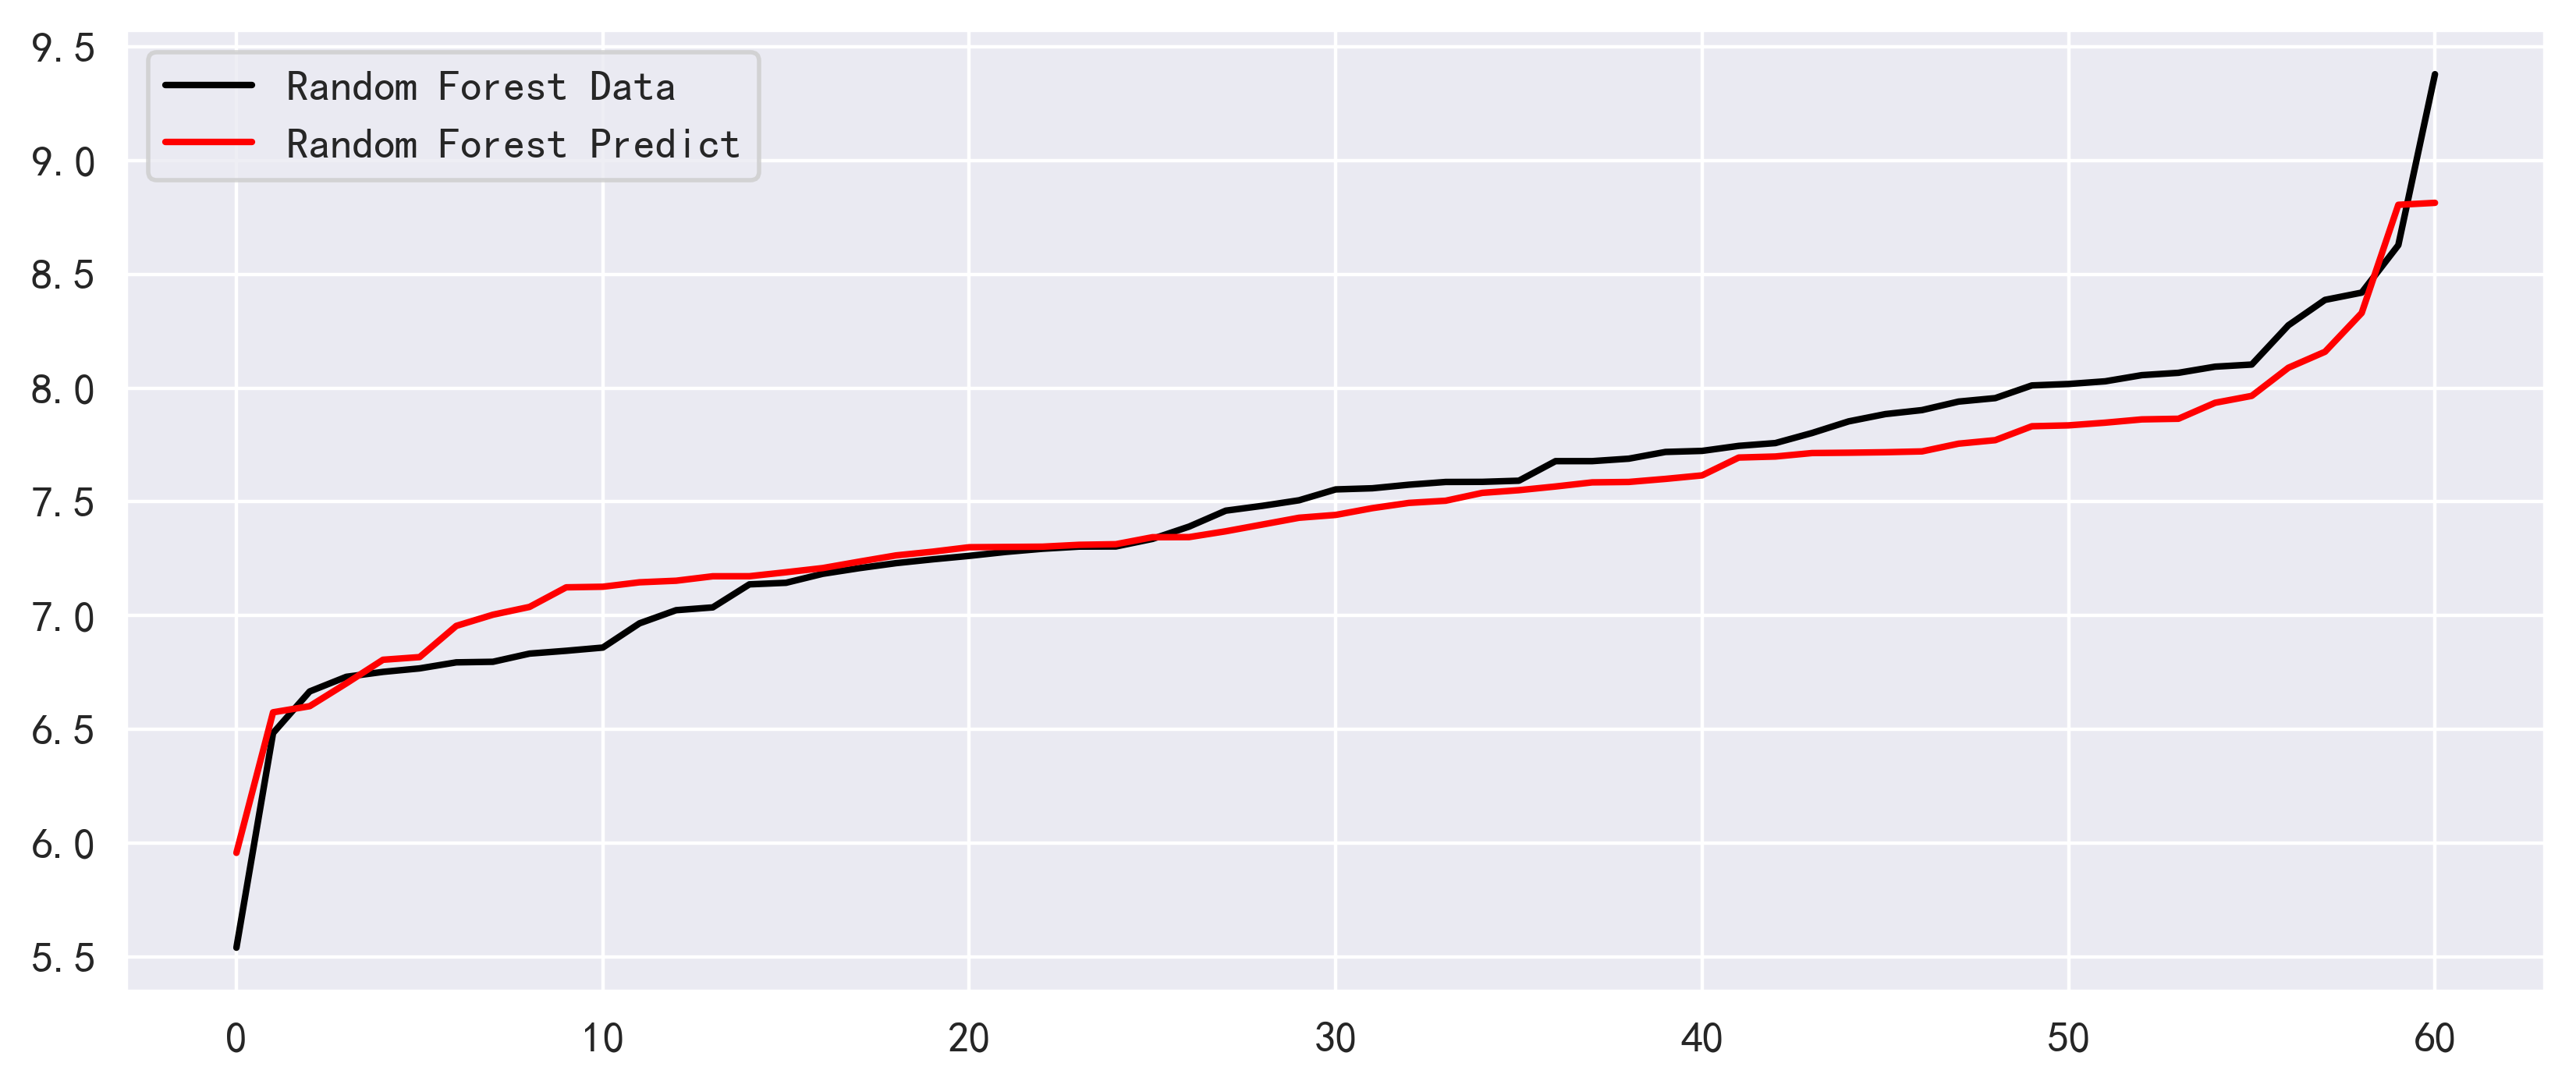

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the mape and smape functions
def mape(y_true,y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

def smape(y_true,y_pred):
    return 2.0 * np.mean(np.abs(y_pred-y_true)/(np.abs(y_pred)+np.abs(y_true)))

# Define the model_evaluate function
def model_evaluate(y_true,y_pred,tp):
    # RMSE Root mean square error
    print("The rmse for our model is {}".format(np.sqrt(mean_squared_error(y_true,y_pred))))
    # R Squared
    print("The R-Square for our model is {}".format(r2_score(y_true,y_pred)))
    # MAE Mean absolute error
    print("\nThe mae for our model is {}".format(mean_absolute_error(y_true,y_pred)))
    # MSE Mean square error
    print("The mse for our model is {}".format(mean_squared_error(y_true,y_pred)))
    # Mape Mean absolute percentage error
    print("The mape for our model is {}".format(mape(y_true,y_pred)))
    # Smape Symmetric Mean Absolute Percentage Error
    print("The smape for our model is {}".format(smape(y_true,y_pred)))
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.figure(figsize=(10,4),dpi=400)
    plt.plot(range(len(y_true)),sorted(y_true),c="black",label= f"{tp} Data")
    plt.plot(range(len(y_pred)),sorted(y_pred),c="red",label = f"{tp} Predict")
    plt.legend()
    plt.savefig("Material Failure Prediction.png", dpi=300)
    plt.show()


# Now evaluate the Random Forest model using the defined function
model_evaluate(y_test, y_pred, "Random Forest")


In [15]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7128886502018239


In [86]:
rf_oob = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=42)
rf_oob.fit(filtered_data_rf, Y)
print(rf_oob.oob_score_)

0.5082014733631799
